<a href="https://colab.research.google.com/github/Edson-Litsur/Data_data_analysis_projects/blob/main/SuperStore_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv(r'/content/Sample_Superstore.csv',encoding='ISO-8859-1')

In [13]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [15]:
#Filling null values
#In this case, in our data we don't have null values
#but if we had we could use the code below


## df.fillna(0,inplace=True)

#This is for specific column
## df["Postal Code"] = fillna(0,inplace=True)
## df["Postal Code"] = df["Postal Code"].astype(int)

In [16]:
#Check for duplicates
if df.duplicated().sum() > 0:
  print("There are duplicates")

  #This line will drop all duplicates in case the existis
  #df.drop_duplicates(inplace=True)

else:
  print("There are no duplicates")

There are no duplicates


In [18]:
#Customer Segmentation (Types os Customers)
Types_of_Customers = df["Segment"].unique()
print(Types_of_Customers)

['Consumer' 'Corporate' 'Home Office']


In [19]:
#Sum of customer per segmentation
number_of_customers = df["Segment"].value_counts().reset_index()
#rename "segment" to "Type of customers"
number_of_customers =number_of_customers.rename(columns={"Segment" : "Type_of_Customers"})
print(number_of_customers)

  Type_of_Customers  count
0          Consumer   5191
1         Corporate   3020
2       Home Office   1783


Text(0.5, 1.0, 'Types of Customers')

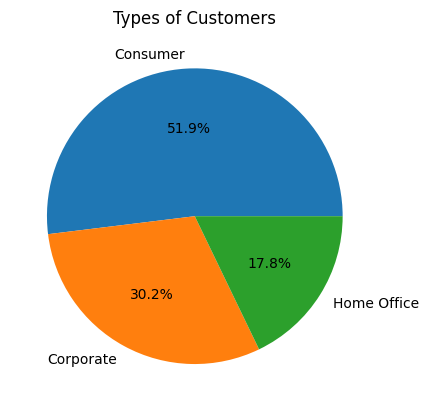

In [21]:
#Visualization
plt.pie(number_of_customers["count"],labels=number_of_customers["Type_of_Customers"], autopct="%1.1f%%")
plt.title("Types of Customers")

In [23]:
#Sales per segment
sales_per_segment = df.groupby("Segment")["Sales"].sum().reset_index()
#rename "segment" by "Total Sales"
sales_per_segment = sales_per_segment.rename(columns={"Sales" : "Total_Sales"})
print(sales_per_segment)

       Segment   Total_Sales
0     Consumer  1.161401e+06
1    Corporate  7.061464e+05
2  Home Office  4.296531e+05


Text(0, 0.5, 'Total Sales')

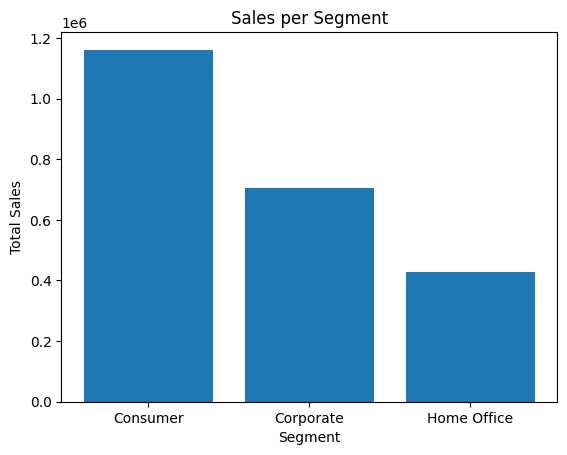

In [24]:
#Plot a visualization
plt.bar(sales_per_segment["Segment"],sales_per_segment["Total_Sales"])
plt.title("Sales per Segment")
plt.xlabel("Segment")
plt.ylabel("Total Sales")

Text(0.5, 1.0, 'Sales per Segment')

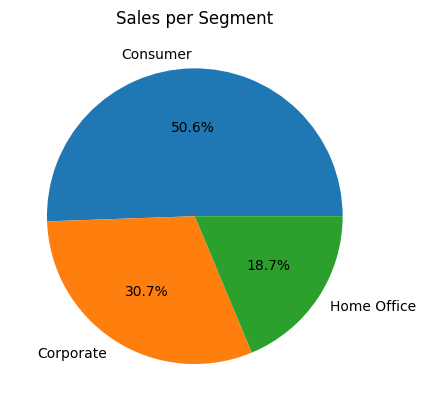

In [25]:
#Pie chart for sales
plt.pie(sales_per_segment["Total_Sales"],labels=sales_per_segment["Segment"], autopct="%1.1f%%")
plt.title("Sales per Segment")

In [29]:
#Calculate the total number of order per customer
customer_order_frequency = df.groupby(["Customer ID", "Customer Name", "Segment"])["Order ID"].count().reset_index()

#Rename "Order ID" to "Total sales"
customer_order_frequency = customer_order_frequency.rename(columns={"Order ID" : "Total_Sales"})

#
repeat_customers = customer_order_frequency[customer_order_frequency["Total_Sales"] > 1]

#Sort the list
repeat_customers_sorted = repeat_customers.sort_values(by="Total_Sales", ascending=False)

#print
print(repeat_customers_sorted.head(12).reset_index(drop=True))

   Customer ID        Customer Name      Segment  Total_Sales
0     WB-21850        William Brown     Consumer           37
1     MA-17560         Matt Abelman  Home Office           34
2     JL-15835             John Lee     Consumer           34
3     PP-18955           Paul Prost  Home Office           34
4     SV-20365          Seth Vernon     Consumer           32
5     JD-15895     Jonathan Doherty    Corporate           32
6     CK-12205  Chloris Kastensmidt     Consumer           32
7     EH-13765         Edward Hooks    Corporate           32
8     EP-13915           Emily Phan     Consumer           31
9     ZC-21910     Zuschuss Carroll     Consumer           31
10    AP-10915       Arthur Prichep     Consumer           31
11    LC-16870        Lena Cacioppo     Consumer           30


In [41]:
#Identify the top spending customer

#sum the sale per customer
customer_sales = df.groupby(["Customer ID", "Customer Name", "Segment"])["Sales"].sum().reset_index()

#Sort by the total spender
top_spending_customer = customer_sales.sort_values(by="Sales", ascending=False)

#print
print(top_spending_customer.head(12).reset_index(drop=True))

   Customer ID       Customer Name      Segment      Sales
0     SM-20320         Sean Miller  Home Office  25043.050
1     TC-20980        Tamara Chand    Corporate  19052.218
2     RB-19360        Raymond Buch     Consumer  15117.339
3     TA-21385        Tom Ashbrook  Home Office  14595.620
4     AB-10105       Adrian Barton     Consumer  14473.571
5     KL-16645        Ken Lonsdale     Consumer  14175.229
6     SC-20095        Sanjit Chand     Consumer  14142.334
7     HL-15040        Hunter Lopez     Consumer  12873.298
8     SE-20110        Sanjit Engle     Consumer  12209.438
9     CC-12370  Christopher Conant     Consumer  12129.072
10    TS-21370        Todd Sumrall    Corporate  11891.751
11    GT-14710           Greg Tran     Consumer  11820.120


In [51]:
#Calculate Wich chipping method customers prefers
shipping_Model = df['Ship Mode'].value_counts().reset_index()
shipping_Model = shipping_Model.rename(columns={'index': 'Use Frequecy', 'Ship Mode' : 'Mode of Shipment'})
print(shipping_Model)

  Mode of Shipment  count
0   Standard Class   5968
1     Second Class   1945
2      First Class   1538
3         Same Day    543


In [62]:
#plt.pie(shipping_Model['Mode of Shipment'], labels=shipping_Model['count'], autopct='%1.1f%%')
#plt.title("Types of Customers")

In [66]:
#Geographic location
#Sum the state with much sales
state = df['State'].value_counts().reset_index()

#rename
state = state.rename(columns={'index': 'State', 'State' : 'States Ranking'})
print(state.head(12))

    States Ranking  count
0       California   2001
1         New York   1128
2            Texas    985
3     Pennsylvania    587
4       Washington    506
5         Illinois    492
6             Ohio    469
7          Florida    383
8         Michigan    255
9   North Carolina    249
10         Arizona    224
11        Virginia    224


In [67]:
city = df['City'].value_counts().reset_index()

#rename
city = city.rename(columns={'index': 'City', 'City' : 'City Ranking'})
print(city.head(12))

     City Ranking  count
0   New York City    915
1     Los Angeles    747
2    Philadelphia    537
3   San Francisco    510
4         Seattle    428
5         Houston    377
6         Chicago    314
7        Columbus    222
8       San Diego    170
9     Springfield    163
10         Dallas    157
11   Jacksonville    125


In [70]:
sales_per_state = df.groupby('State')['Sales'].sum().reset_index()
top_sales_per_state = sales_per_state.sort_values(by='Sales', ascending=False)
print(top_sales_per_state.head(12))

             State        Sales
3       California  457687.6315
30        New York  310876.2710
41           Texas  170188.0458
45      Washington  138641.2700
36    Pennsylvania  116511.9140
8          Florida   89473.7080
11        Illinois   80166.1010
33            Ohio   78258.1360
20        Michigan   76269.6140
44        Virginia   70636.7200
31  North Carolina   55603.1640
12         Indiana   53555.3600


In [71]:
sales_per_city = df.groupby('City')['Sales'].sum().reset_index()
top_sales_per_city = sales_per_city.sort_values(by='Sales', ascending=False)
print(top_sales_per_city.head(12))

              City        Sales
329  New York City  256368.1610
266    Los Angeles  175851.3410
452        Seattle  119540.7420
438  San Francisco  112669.0920
374   Philadelphia  109077.0130
207        Houston   64504.7604
80         Chicago   48539.5410
437      San Diego   47521.0290
216   Jacksonville   44713.1830
464    Springfield   43054.3420
123        Detroit   42446.9440
94        Columbus   38706.2430


In [72]:
#Category of product
products = df['Category'].unique()
print(products)

['Furniture' 'Office Supplies' 'Technology']


In [73]:
#Subcategory of product
product_subcategory = df['Sub-Category'].unique()
print(product_subcategory)

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [74]:
#Calculate the total number of subcategory per category
sub_category_per_category = df.groupby('Category')['Sub-Category'].nunique().reset_index()
sub_category_per_category = sub_category_per_category.sort_values(by='Sub-Category', ascending=False)
print(sub_category_per_category)

          Category  Sub-Category
1  Office Supplies             9
0        Furniture             4
2       Technology             4


Text(0, 0.5, 'Sub-Category')

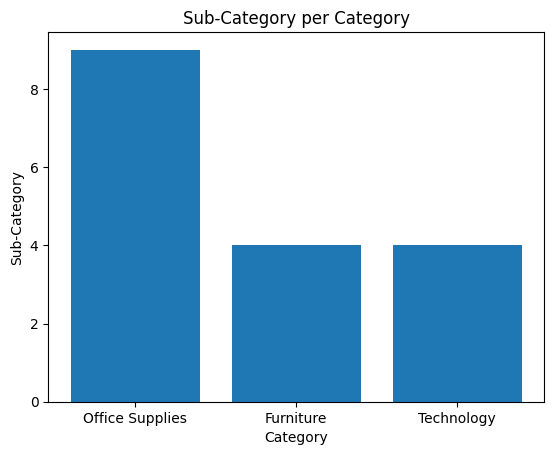

In [81]:
plt.bar(sub_category_per_category['Category'],sub_category_per_category['Sub-Category'])
plt.title("Sub-Category per Category")
plt.xlabel("Category")
plt.ylabel("Sub-Category")

In [82]:
#The most popular subcategory
most_popular_sub_category = df.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index()
most_popular_sub_category = most_popular_sub_category.sort_values(by='Sales', ascending=False)
print(most_popular_sub_category)

           Category Sub-Category        Sales
16       Technology       Phones  330007.0540
1         Furniture       Chairs  328449.1030
11  Office Supplies      Storage  223843.6080
3         Furniture       Tables  206965.5320
6   Office Supplies      Binders  203412.7330
15       Technology     Machines  189238.6310
13       Technology  Accessories  167380.3180
14       Technology      Copiers  149528.0300
0         Furniture    Bookcases  114879.9963
4   Office Supplies   Appliances  107532.1610
2         Furniture  Furnishings   91705.1640
10  Office Supplies        Paper   78479.2060
12  Office Supplies     Supplies   46673.5380
5   Office Supplies          Art   27118.7920
7   Office Supplies    Envelopes   16476.4020
9   Office Supplies       Labels   12486.3120
8   Office Supplies    Fasteners    3024.2800


Text(0.5, 1.0, 'Most Popular Sub-Category')

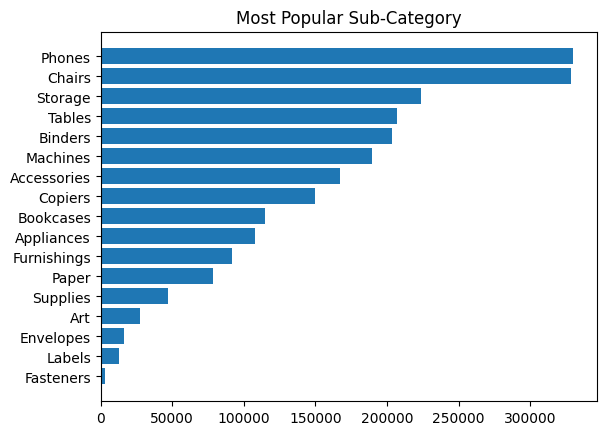

In [91]:
most_popular_sub_category=most_popular_sub_category.sort_values(by='Sales', ascending=True)
plt.barh(most_popular_sub_category['Sub-Category'],most_popular_sub_category['Sales'])
plt.title("Most Popular Sub-Category")

In [78]:
#The Category that sales the most
sales_per_category = df.groupby('Category')['Sales'].sum().reset_index()
sales_per_category = sales_per_category.sort_values(by='Sales', ascending=False)
print(sales_per_category)

          Category        Sales
2       Technology  836154.0330
0        Furniture  741999.7953
1  Office Supplies  719047.0320


Text(0.5, 1.0, 'Sales per Category')

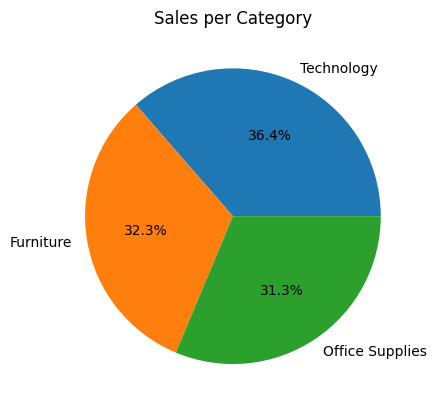

In [79]:
plt.pie(sales_per_category['Sales'], labels=sales_per_category['Category'], autopct='%1.1f%%')
plt.title("Sales per Category")

In [94]:
#Sales per year
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
sales_per_year = df.groupby('Year')['Sales'].sum().reset_index()
sales_per_year

,Year,Sales
0,2014,484247.4981
1,2015,470532.5090
2,2016,609205.5980
3,2017,733215.2552


Text(0, 0.5, 'Sales')

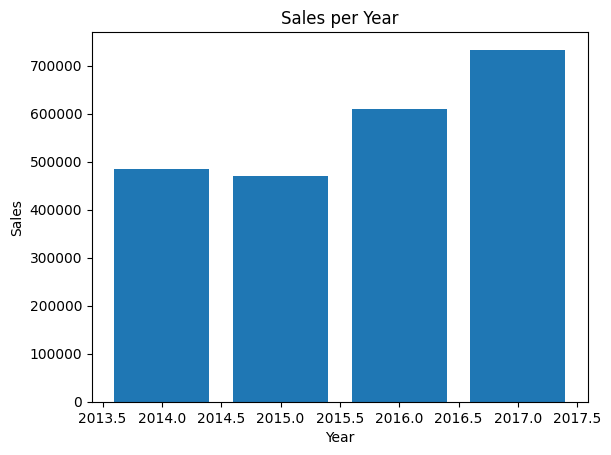

In [95]:
plt.bar(sales_per_year['Year'],sales_per_year['Sales'])
plt.title("Sales per Year")
plt.xlabel("Year")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

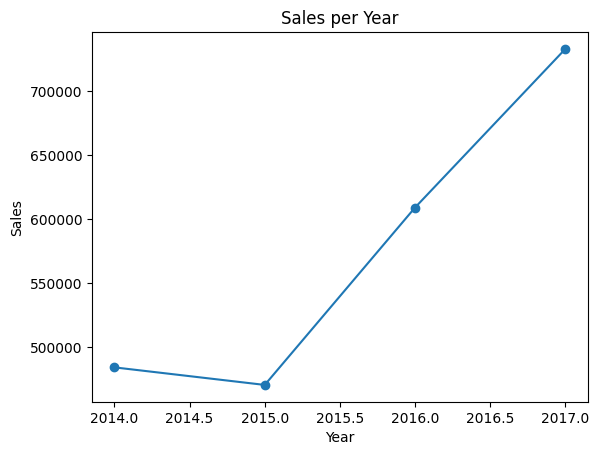

In [97]:
#We can also use plot to present the yearly sales
plt.plot(sales_per_year['Year'],sales_per_year['Sales'], marker='o', linestyle='-')
plt.title("Sales per Year")
plt.xlabel("Year")
plt.ylabel("Sales")

In [106]:
#Quarter Sales of 2018
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
year_sales = df[df['Order Date'].dt.year == 2017]
quarter_sales = year_sales.resample('QE', on='Order Date')['Sales'].sum()
quarter_sales = quarter_sales.reset_index()
quarter_sales = quarter_sales.rename(columns={'Order Date': 'Quarter', 'Sales':'Total Sales'})
print(quarter_sales)


     Quarter  Total Sales
0 2017-03-31  123144.8602
1 2017-06-30  133764.3720
2 2017-09-30  196251.9560
3 2017-12-31  280054.0670


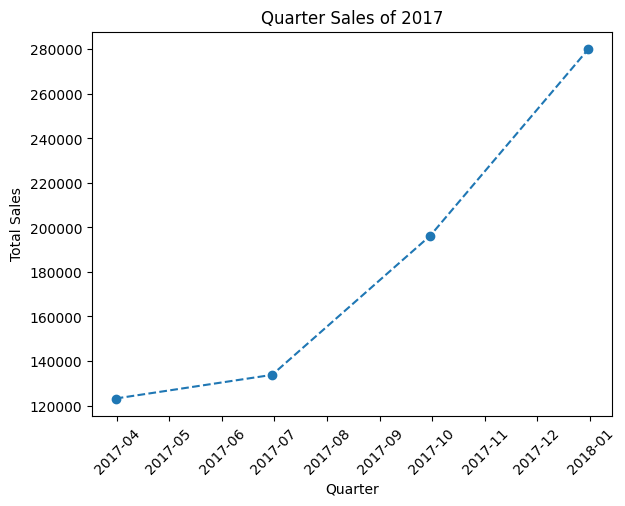

In [111]:
plt.plot(quarter_sales['Quarter'],quarter_sales['Total Sales'], marker='o', linestyle='--')
plt.title("Quarter Sales of 2017")
plt.xlabel("Quarter")
plt.ylabel("Total Sales")

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [112]:
#Monthly Sales
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
monthly_sales

,Month,Sales
0,1,94924.8356
1,2,59751.2514
2,3,205005.4888
3,4,137762.1286
4,5,155028.8117
5,6,152718.6793
6,7,147238.0970
7,8,159044.0630
8,9,307649.9457
9,10,200322.9847


Text(0, 0.5, 'Sales')

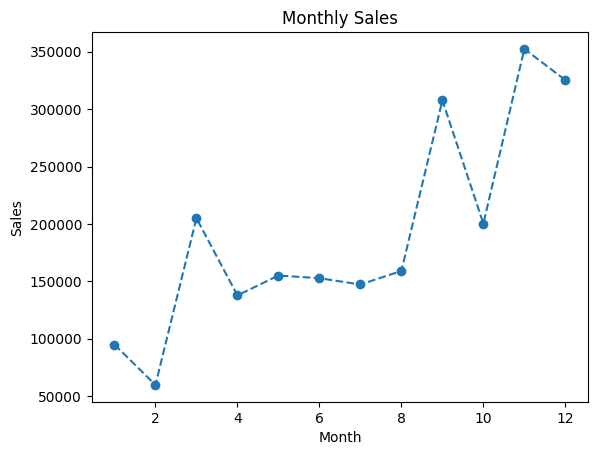

In [113]:
plt.plot(monthly_sales['Month'],monthly_sales['Sales'], marker='o', linestyle='--')
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales")